In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import gensim
import gensim.downloader as api

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML

[nltk_data] Downloading package punkt to /Users/taishi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taishi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read Excel file 

In [2]:
path = 'Data/table_data.xlsx'
df = pd.read_excel(path, sheet_name='Item_info')

df.head()

,description,rating,price,num_reviews,item_url,img_url
0,Gaming Chair Office Chair Racing Chair with Fo...,4.0 out of 5 stars,$124.99,58,https://www.amazon.com//gp/slredirect/picassoR...,https://m.media-amazon.com/images/I/51QVMawqOA...
1,Amazon Basics Classic Puresoft PU-Padded Mid-B...,4.4 out of 5 stars,$78.99,"8,477",https://www.amazon.com//AmazonBasics-Puresoft-...,https://m.media-amazon.com/images/I/71i08qnZeD...
2,Home Office Chair Ergonomic Desk Chair Mid-Bac...,4.3 out of 5 stars,$49.99,"3,514",https://www.amazon.com//Home-Office-Chair-Comf...,https://m.media-amazon.com/images/I/71ilabF2PP...
3,KOLLIEE Mid Back Mesh Office Chair Ergonomic S...,3.9 out of 5 stars,$99.99,"4,159",https://www.amazon.com//SINOVO-Ergonomic-Compu...,https://m.media-amazon.com/images/I/61FbxgUGf3...
4,Hbada Office Task Desk Chair Swivel Home Comfo...,4.2 out of 5 stars,$129.99,"9,767",https://www.amazon.com//Hbada-Office-Comfort-F...,https://m.media-amazon.com/images/I/41ony8a6Oi...


### Clean data in description column 

In [3]:
list_sw = set(stopwords.words('english') + list(punctuation))

# Lower case for text columns
df['description'] = df['description'].str.lower()

# Tokenize
df['description'] = df['description'].apply(word_tokenize)

# Stop words
df['description'] = df['description'].apply(lambda x: [word for word in x if word not in list_sw])

# Remove punctuation
df['description'] = df['description'].apply(lambda x: [word.translate(str.maketrans('', '', punctuation)) for word in x])

# Remove duplicated words
df['description'] = df['description'].apply(lambda x: list(set(x)))

# Download pretrained Google word2vec model
path = api.load("word2vec-google-news-300", return_path=True)

# Load the trained model from the path
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

# Select pre-trained words (Google has trained 3 million words and phrases)
df['description'] = df['description'].apply(lambda x: [word for word in x if word in model.vocab])

df.head()

,description,rating,price,num_reviews,item_url,img_url
0,"[footrest, lumbar, gaming, esports, height, he...",4.0 out of 5 stars,$124.99,58,https://www.amazon.com//gp/slredirect/picassoR...,https://m.media-amazon.com/images/I/51QVMawqOA...
1,"[black, classic, midback, amazon, desk, chair,...",4.4 out of 5 stars,$78.99,"8,477",https://www.amazon.com//AmazonBasics-Puresoft-...,https://m.media-amazon.com/images/I/71i08qnZeD...
2,"[black, lumbar, midback, ergonomic, comfortabl...",4.3 out of 5 stars,$49.99,"3,514",https://www.amazon.com//Home-Office-Chair-Comf...,https://m.media-amazon.com/images/I/71ilabF2PP...
3,"[black, arms, lumbar, mid, ergonomic, flip, he...",3.9 out of 5 stars,$99.99,"4,159",https://www.amazon.com//SINOVO-Ergonomic-Compu...,https://m.media-amazon.com/images/I/61FbxgUGf3...
4,"[arms, black, chairs, height, task, desk, home...",4.2 out of 5 stars,$129.99,"9,767",https://www.amazon.com//Hbada-Office-Comfort-F...,https://m.media-amazon.com/images/I/41ony8a6Oi...


### Clean data in rating column

In [4]:
# Float rating number
df['rating'] = df['rating'].apply(lambda x: float(x.split()[0]))

df.head()

,description,rating,price,num_reviews,item_url,img_url
0,"[footrest, lumbar, gaming, esports, height, he...",4.0,$124.99,58,https://www.amazon.com//gp/slredirect/picassoR...,https://m.media-amazon.com/images/I/51QVMawqOA...
1,"[black, classic, midback, amazon, desk, chair,...",4.4,$78.99,"8,477",https://www.amazon.com//AmazonBasics-Puresoft-...,https://m.media-amazon.com/images/I/71i08qnZeD...
2,"[black, lumbar, midback, ergonomic, comfortabl...",4.3,$49.99,"3,514",https://www.amazon.com//Home-Office-Chair-Comf...,https://m.media-amazon.com/images/I/71ilabF2PP...
3,"[black, arms, lumbar, mid, ergonomic, flip, he...",3.9,$99.99,"4,159",https://www.amazon.com//SINOVO-Ergonomic-Compu...,https://m.media-amazon.com/images/I/61FbxgUGf3...
4,"[arms, black, chairs, height, task, desk, home...",4.2,$129.99,"9,767",https://www.amazon.com//Hbada-Office-Comfort-F...,https://m.media-amazon.com/images/I/41ony8a6Oi...


### Clean data in price column

In [5]:
# Float price number
df['price'] = df['price'].apply(lambda x: float(x[1:]))

df.head()

,description,rating,price,num_reviews,item_url,img_url
0,"[footrest, lumbar, gaming, esports, height, he...",4.0,124.99,58,https://www.amazon.com//gp/slredirect/picassoR...,https://m.media-amazon.com/images/I/51QVMawqOA...
1,"[black, classic, midback, amazon, desk, chair,...",4.4,78.99,"8,477",https://www.amazon.com//AmazonBasics-Puresoft-...,https://m.media-amazon.com/images/I/71i08qnZeD...
2,"[black, lumbar, midback, ergonomic, comfortabl...",4.3,49.99,"3,514",https://www.amazon.com//Home-Office-Chair-Comf...,https://m.media-amazon.com/images/I/71ilabF2PP...
3,"[black, arms, lumbar, mid, ergonomic, flip, he...",3.9,99.99,"4,159",https://www.amazon.com//SINOVO-Ergonomic-Compu...,https://m.media-amazon.com/images/I/61FbxgUGf3...
4,"[arms, black, chairs, height, task, desk, home...",4.2,129.99,"9,767",https://www.amazon.com//Hbada-Office-Comfort-F...,https://m.media-amazon.com/images/I/41ony8a6Oi...


### Clean data in num_reviews column

In [6]:
# Int review number
df['num_reviews'] = df['num_reviews'].apply(lambda x: int(x.replace(',','')))

df.head()

,description,rating,price,num_reviews,item_url,img_url
0,"[footrest, lumbar, gaming, esports, height, he...",4.0,124.99,58,https://www.amazon.com//gp/slredirect/picassoR...,https://m.media-amazon.com/images/I/51QVMawqOA...
1,"[black, classic, midback, amazon, desk, chair,...",4.4,78.99,8477,https://www.amazon.com//AmazonBasics-Puresoft-...,https://m.media-amazon.com/images/I/71i08qnZeD...
2,"[black, lumbar, midback, ergonomic, comfortabl...",4.3,49.99,3514,https://www.amazon.com//Home-Office-Chair-Comf...,https://m.media-amazon.com/images/I/71ilabF2PP...
3,"[black, arms, lumbar, mid, ergonomic, flip, he...",3.9,99.99,4159,https://www.amazon.com//SINOVO-Ergonomic-Compu...,https://m.media-amazon.com/images/I/61FbxgUGf3...
4,"[arms, black, chairs, height, task, desk, home...",4.2,129.99,9767,https://www.amazon.com//Hbada-Office-Comfort-F...,https://m.media-amazon.com/images/I/41ony8a6Oi...


### Remove duplicated values

In [7]:
df=df.drop_duplicates(subset=['rating', 'price', 'num_reviews'], keep='last')

### Analyse corrletion 

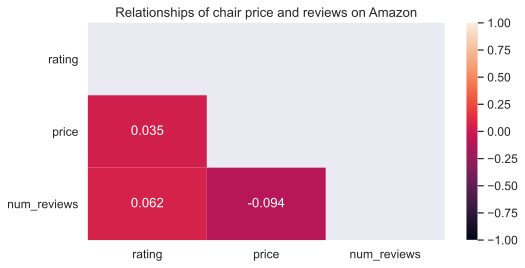

In [8]:
sns.set_theme()
sns.set_context("notebook", font_scale=1.1)

plt.figure(figsize=(8, 4))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title('Relationships of chair price and reviews on Amazon')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.savefig('Data/correlation.png', dpi=300);

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

The figure above shows ***Neutral Correlation*** meaning <mark>no major relations among rating, price, and number of reviews</mark>

### Analyse price range

In [9]:
price_mean = df['price'].mean()
df['reasonable price?'] = df['price'].apply(lambda x: 'yes' if x<price_mean else 'no')

review_mean = df['num_reviews'].mean()
df['enough reviews?'] = df['num_reviews'].apply(lambda x: 'yes' if x>review_mean else 'no')

rating_mean = df['rating'].mean()
df['good rating?'] = df['rating'].apply(lambda x: 'yes' if (x>rating_mean) else 'no')


def overall(row):
    if row['num_reviews']>review_mean and row['rating']>rating_mean and row['price']<price_mean:
        return 'good'
    elif row['rating']>rating_mean and (row['num_reviews']>review_mean or row['price']<price_mean):
        return 'okay'
    else:
        return 'bad'
    
df['overall response'] = df.apply(overall, axis=1)

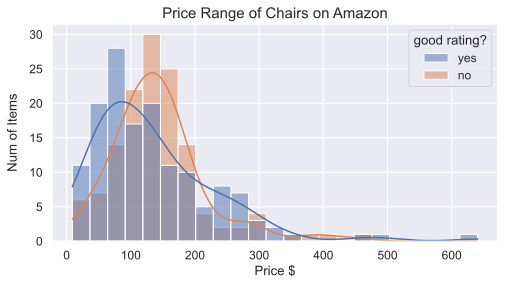

In [10]:
sns.set_context("notebook", font_scale=1.1)
plt.figure(figsize=(8, 4))
histgram = sns.histplot(x='price', data=df, kde=True, hue='good rating?', hue_order=['yes','no'])
histgram.set_title('Price Range of Chairs on Amazon', size = 15)
histgram.set_xlabel('Price $', rotation=0)
histgram.set_ylabel('Num of Items', labelpad=10)
plt.savefig('Data/price_hist.png', dpi=300);

The figure above shows the rating of items according to their rating and review number. A good response refers to a sufficient number of ratings above the averages. On the other hand, the bad response refers to any ratings below the average. <mark> The figure shows no relations between price and rating </mark>

### Distribution of Rating

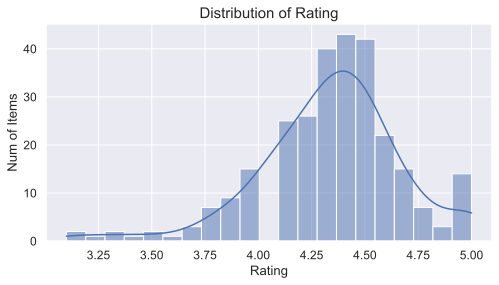

In [11]:
plt.figure(figsize=(8, 4))
distribution = sns.histplot(x='rating', data=df, kde=True)
distribution.set_xlabel("Rating")
distribution.set_ylabel("Num of Items")
distribution.set_title("Distribution of Rating", size = 15)
plt.savefig('Data/distribution_rating.png', dpi=300);

### Distribution of reviews

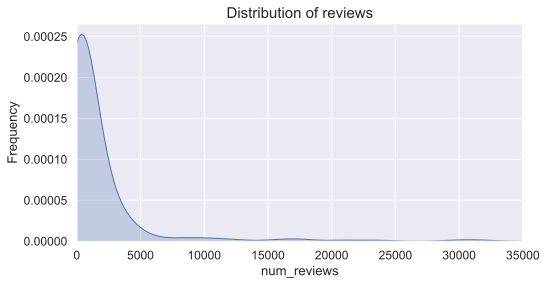

In [12]:
plt.figure(figsize=(8, 4))
distribution = sns.kdeplot(x='num_reviews', data=df, shade = True)
distribution.set_xlabel("num_reviews")
distribution.set_ylabel("Frequency")
distribution.set_xlim(0,35000)
distribution.set_title("Distribution of reviews", size = 15)
plt.savefig('Data/distribution_reviews.png', dpi=300);

### Find frequency of words

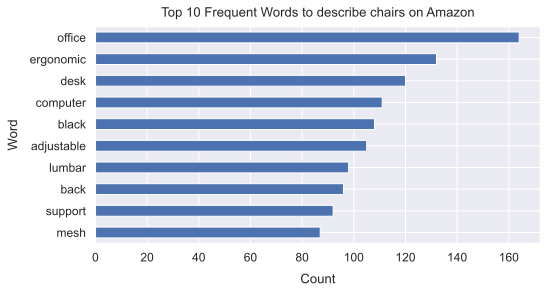

In [13]:
plt.figure(figsize=(8, 4))
df_frequency = pd.value_counts(df['description'].sum()).iloc[1:11].sort_values()
count_plot = df_frequency.plot(kind='barh')
count_plot.set_title('Top 10 Frequent Words to describe chairs on Amazon', pad=10)
count_plot.set_xlabel('Count', rotation=0, labelpad=10)
count_plot.set_ylabel('Word', labelpad=10)
plt.savefig('Data/word_frequency.png', dpi=300);

### Recommendation engine according to item's description, price, rating, and number of reviews

In [14]:
# Display results
def show_images(df_recommend):
    script=''
    html="<a target='_blank' href='{}' >{} stars <br> {} reviews <br> ${} <br> </a> <img src='{}' width=90px /> <br>"
    for i in range(len(df_recommend)):
        script+=html.format(df_recommend['item_url'].iloc[i], df_recommend['rating'].iloc[i], 
                   df_recommend['num_reviews'].iloc[i], df_recommend['price'].iloc[i], df_recommend['img_url'].iloc[i])
    return display(HTML(script))


# Recommend engine
def recommend(search, df):
    search = search.strip().split()
    search = [word for word in search if word in model.vocab]
    df_recommend = df.copy()
    df_recommend['similarity'] = df_recommend['description'].apply(lambda x: model.n_similarity(search,x))
    df_recommend = df_recommend.loc[df_recommend['enough reviews?']=='yes']
    df_recommend = df_recommend.sort_values(['similarity'], ascending=False).iloc[:5]
    df_recommend['overall similarity'] = ((df_recommend['rating']/5) + df_recommend['similarity'] + (df_recommend['num_reviews']/df_recommend['num_reviews'].max()) + (1 - df_recommend['price']/df_recommend['price'].max()))/4
    df_recommend = df_recommend.sort_values(['overall similarity'], ascending=False)
    return show_images(df_recommend)


In [15]:
recommend('gaming chair',df)

In [16]:
recommend('office chair',df)